# analysis of particles in analytical flows

In [9]:
# import needed packages


import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('../python_style_Meike.mplstyle')

#set directories
#set input and output directories
base_directory='/storage/shared/oceanparcels/output_data/data_Meike/MR_advection/'

# set files 
input_directory_particles=base_directory + 'particle_simulations/'
input_files_particles = np.array(['tracer_particles_RK4_dt2_Kaufmann_vortex.zarr','tracer_particles_EE_dt2_Kaufmann_vortex.zarr','tracer_particles_EE_dt002_Kaufmann_vortex.zarr'])

input_file_flow = base_directory + 'fieldsets/kaufmann_vortex_field.nc' 

In [ ]:
dataset={}
for i in range(input_files_particles.size):
    dataset[i]=xr.open_zarr(input_directory_particles+input_files_particles[i],decode_times= False)


flowset=xr.open_dataset(input_file_flow,decode_times=False)

In [ ]:
#plot analytical flow
fig,ax=plt.subplots()
lonsflow=flowset['lon'].values
latsflow=flowset['lat'].values
longrid,latsgrid= np.meshgrid(lonsflow,latsflow)
Uflow=flowset['U'][0,:,:].values
Vflow=flowset['V'][0,:,:].values

ax.streamplot(longrid,latsgrid,Uflow,Vflow,color='k')
pcm=ax.pcolormesh(longrid,latsgrid,np.sqrt(Uflow**2+Vflow**2),cmap='Blues')
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
cbar=fig.colorbar(pcm,label='speed')



In [ ]:
#plot particles
titlelist=['RK4, dt=2','EE dt=2','EE dt=0.02']
for i in range(3):
    lonp=dataset[i]['lon'].values
    latp=dataset[i]['lat'].values
    print()
    tmax=250-1
    fig,ax=plt.subplots()
    ax.plot(lonp[:,:tmax+1].T,latp[:,:tmax+1].T,color='black')
    ax.plot(lonp[:,0].T,latp[:,0].T,'>',color='green')
    ax.plot(lonp[:,tmax].T,latp[:,tmax].T,'s',color='red')
    pcm=ax.pcolormesh(longrid,latsgrid,np.sqrt(Uflow**2+Vflow**2),cmap='Blues')
    ax.set_ylim(-30,30)
    ax.set_xlim(-30,30)
    ax.set_title(titlelist[i])



lonp[:,-1]

# Conclusion testing some settings
I did perform several simulations with different settings, and the timestepping determines how well the particle follows the field (the RK4 outperforms the EE with a landslide, dt=2 still workds for RK4 while EE does not work. Need dt=0.02 for EE to get something ok

In [3]:
## testing MR settings
datasetMR={}
names=np.array(['Inertia_particle_Kaufmann_vortex_EC_B080_tau1E0.zarr','Inertia_particle_Kaufmann_vortex_EC_B100_tau1E0.zarr','Inertia_particle_Kaufmann_vortex_EC_B120_tau1E0.zarr','Inertia_particle_Kaufmann_vortex_RK4_B080_tau1E0.zarr','Inertia_particle_Kaufmann_vortex_RK4_B100_tau1E0.zarr','Inertia_particle_Kaufmann_vortex_RK4_B120_tau1E0.zarr'])
for i in range(len(names)):
    datasetMR[i]=xr.open_zarr(input_directory_particles+names[i],decode_times=False)

tmax=999



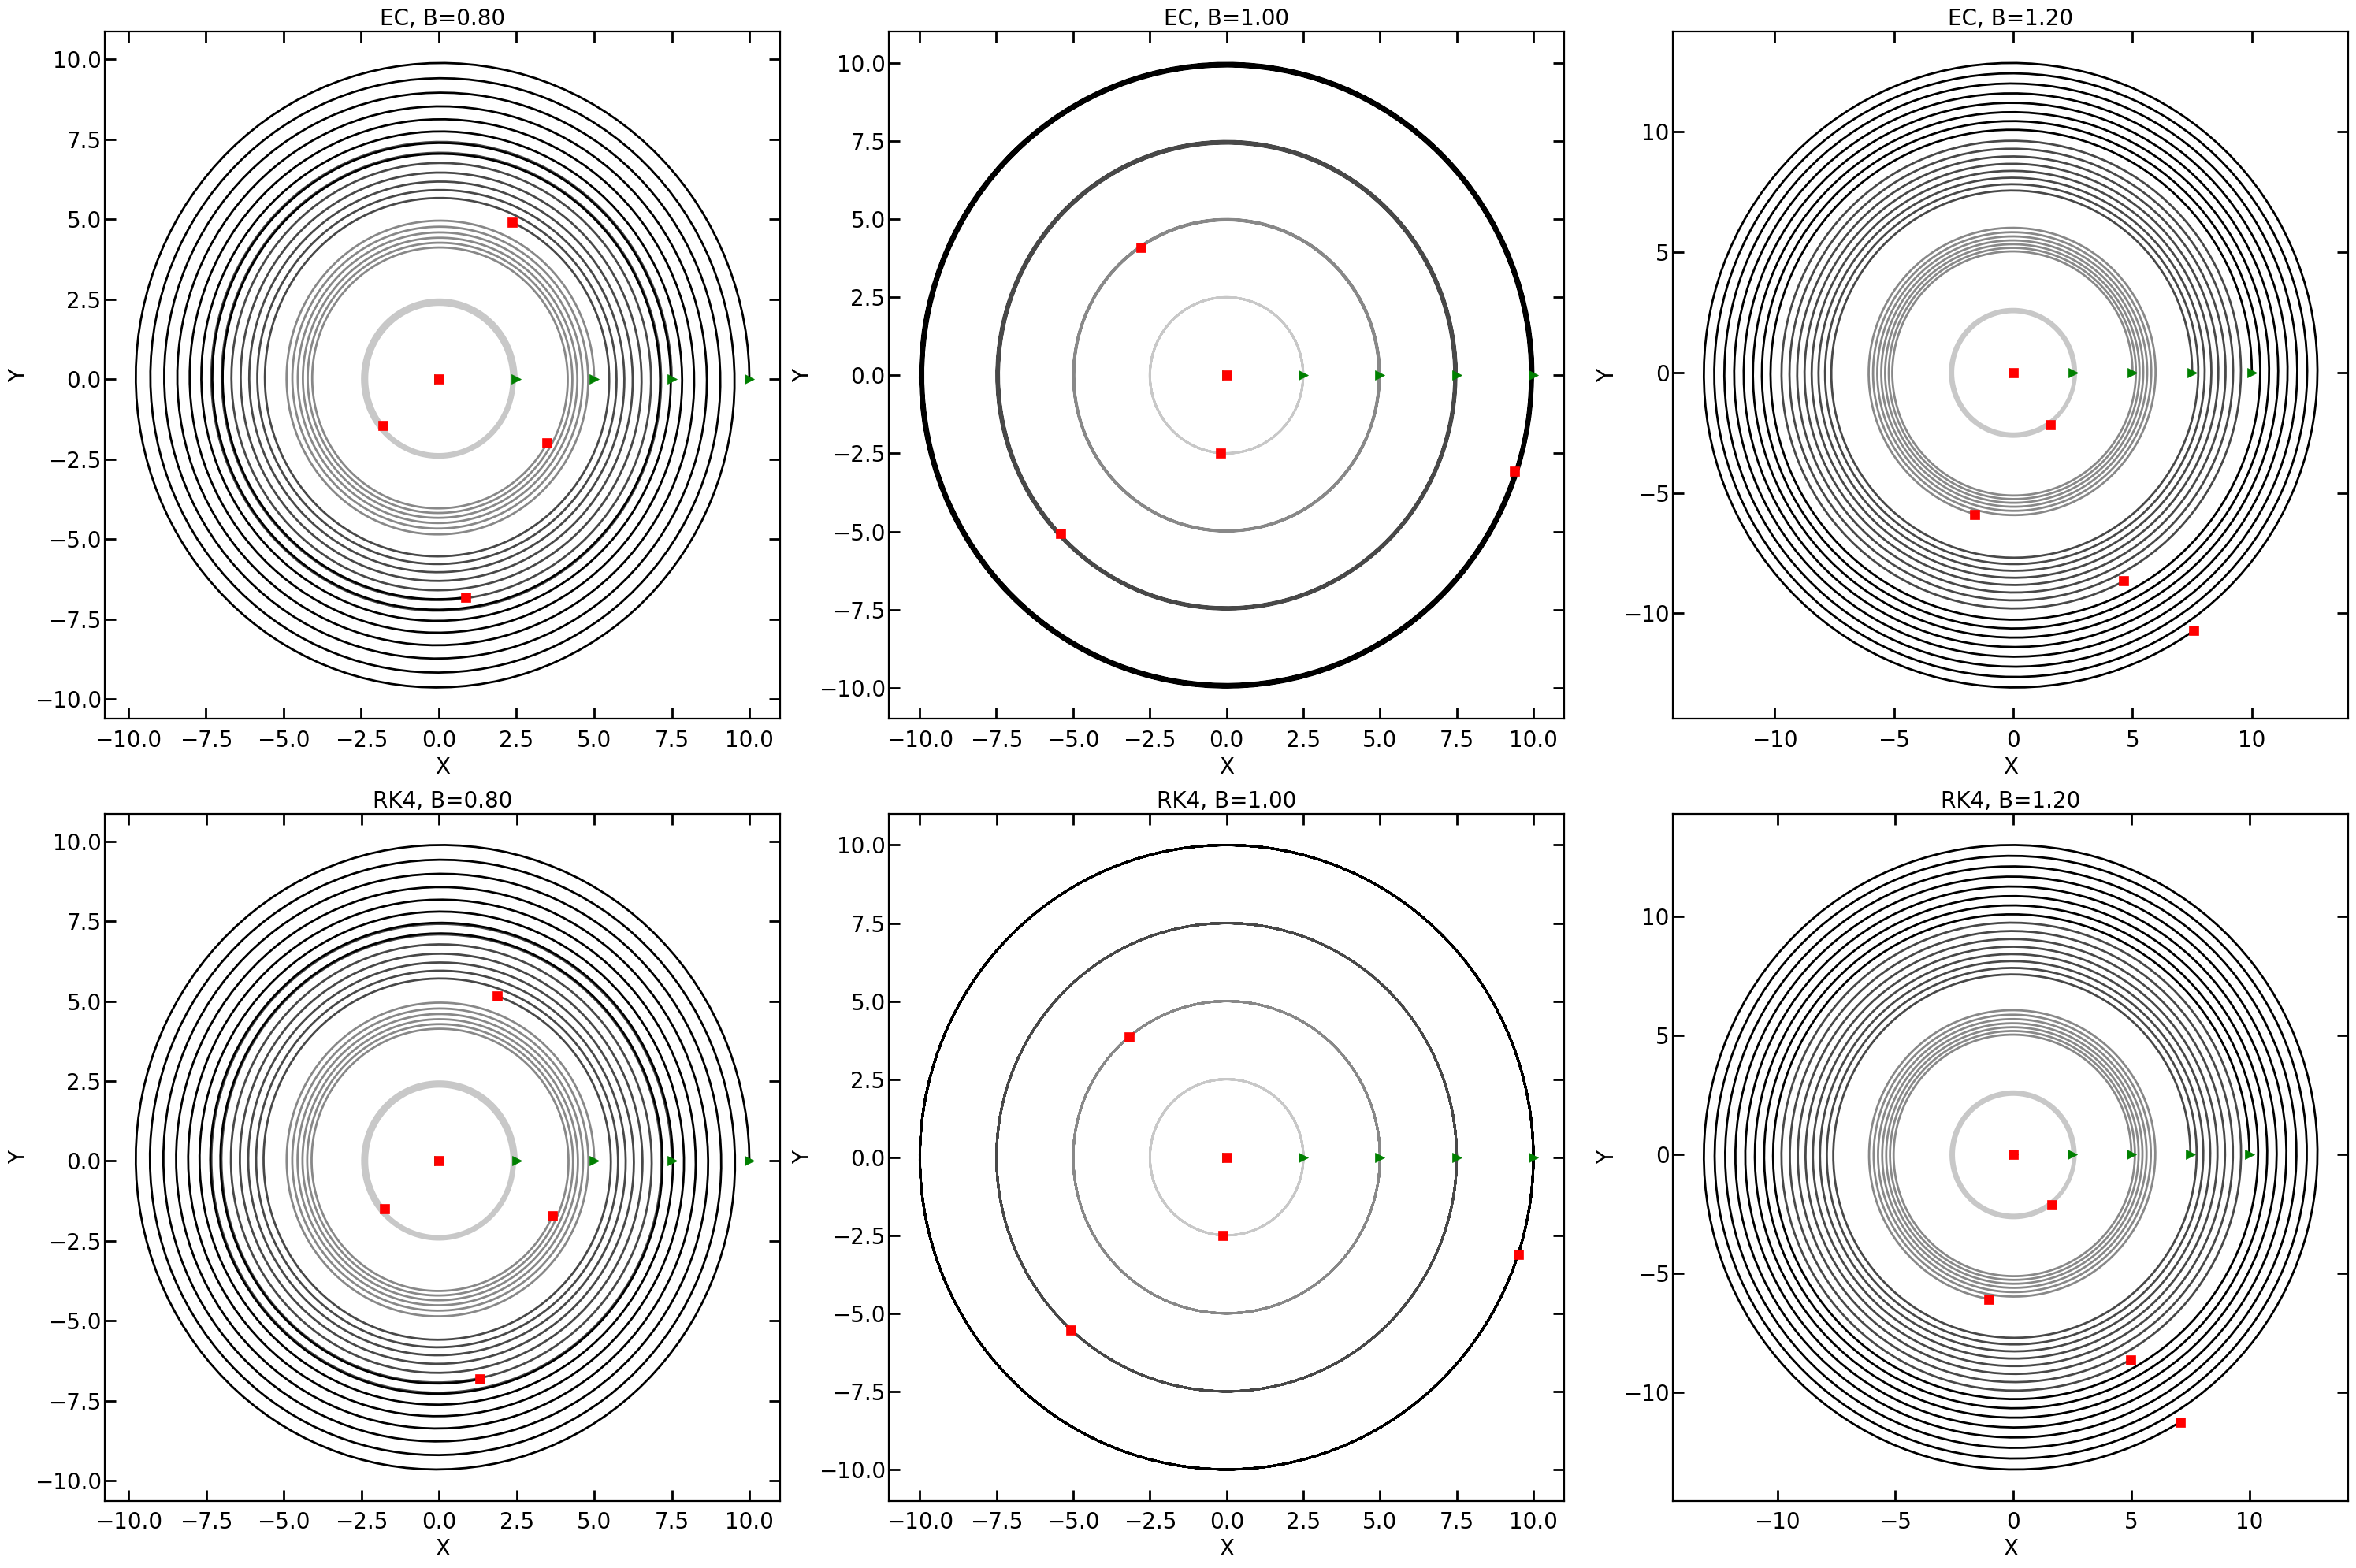

In [31]:
fig,axs=plt.subplots(2,3,figsize=(30,20))
n=0
m=0



nparticles=datasetMR[0].attrs['nparticles']
cmap = plt.get_cmap('Grays')
greyarray=cmap(np.linspace(0.1,1,nparticles))


integration=np.array(['EC','RK4'])
Barray=np.array([0.8,1.0,1.2,0.8,1.0,1.2])


for i in range(len(names)):
    lonp=datasetMR[i]['lon'][:,:tmax+1].values
    latp=datasetMR[i]['lat'][:,:tmax+1].values
    for j in range(nparticles):
        axs[m,n].plot(lonp[j],latp[j],color=greyarray[j],zorder=-20)
    axs[m,n].plot(lonp[:,0].T,latp[:,0].T,'>',color='green')
    axs[m,n].plot(lonp[:,-1].T,latp[:,-1].T,'s',color='red')
    axs[m,n].set_title(integration[m]+", B={:.02f}".format(Barray[i]),fontsize=20)
    axs[m,n].set_xlabel('X')
    axs[m,n].set_ylabel('Y')
#ax.scatter(lonp.T,latp.T,c=time.T, cmap='viridis')

    n+=1
    if(n%3==0):
        n=0
        m=1
        
    
# ax.set_xlim(2.45,2.55)
# ax.set_ylim(-0.1,0.1)

fig.tight_layout()
fig.savefig('../figures/MR_advection_kaufmann_vortext_B_EC_and_RK4.pdf')
